# Importação da bibliotecas

In [18]:
import pandas as pd
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt


import timeit

# Definição de constantes

In [2]:
m = 200 # altura da imagem
n = 200 # largura da imagem
DIMENSAO_IMAGEM = (m, n)

# Definição de funções

In [3]:
def tratar_imagem(caminho: str) -> np.ndarray :
    # Carrega a imagem em uma variável
    imagem = Image.open(caminho)
    # Redimensiona a imagem
    imagem = imagem.resize(DIMENSAO_IMAGEM)
    # Converte a imagem para escala de cinza
    imagem = imagem.convert('L')

    # Converte a imagem para um vetor
    vetor_imagem = np.array(imagem)
    # Torna o vetor unidmentsinal e o normaliza
    vetor_imagem = vetor_imagem.flatten() / 255

    return vetor_imagem


def exibir_imagem(vetor_imagem: np.ndarray) -> None :
    # Transforma o vetor unidmensional em uma matriz (m x n)
    imagem = np.resize(vetor_imagem, DIMENSAO_IMAGEM)
    
    # Configurações para a plotagem da imagem
    plot = plt.imshow(imagem, cmap='gray')
    plt.axis('off')
    plt.show()

    # TODO - DEBUG - EXCLUIR
    print(imagem.shape)
    
    return


def varrer_banco_imagens(caminho: str) -> np.ndarray :
    # Gera uma lista com os vetores das faces
    banco_imagens = []
    for arquivo in glob.glob(caminho):
        banco_imagens.append(tratar_imagem(arquivo))
        
    # Converte a lista para uma matriz (q x m*n), sendo 'q' a quantidade de imagens
    matriz_imagens = np.array(banco_imagens)
    
    return matriz_imagens

# Gerar matrizes A e M, além da face média 

In [4]:
# Matriz A(mn x q) na qual as colunas são as faces do banco de imagens
A = varrer_banco_imagens('banco_imagens/*')

# Vetor f(mn x 1) com a média dos valores de A, ou seja, a face média
f_face_media = np.mean(A, axis=0)

# Matriz M(mn x q) de média corrigida
M = A - f_face_media 

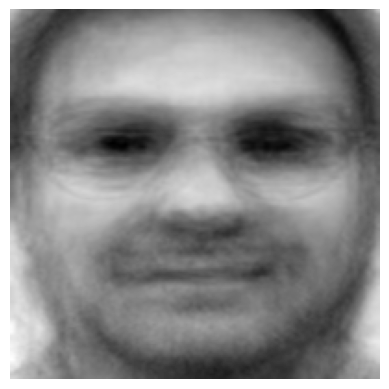

(200, 200)


In [5]:
exibir_imagem(f_face_media)

# Visualizar as faces originais (em A) e as faces corrigidas pela média (em M)

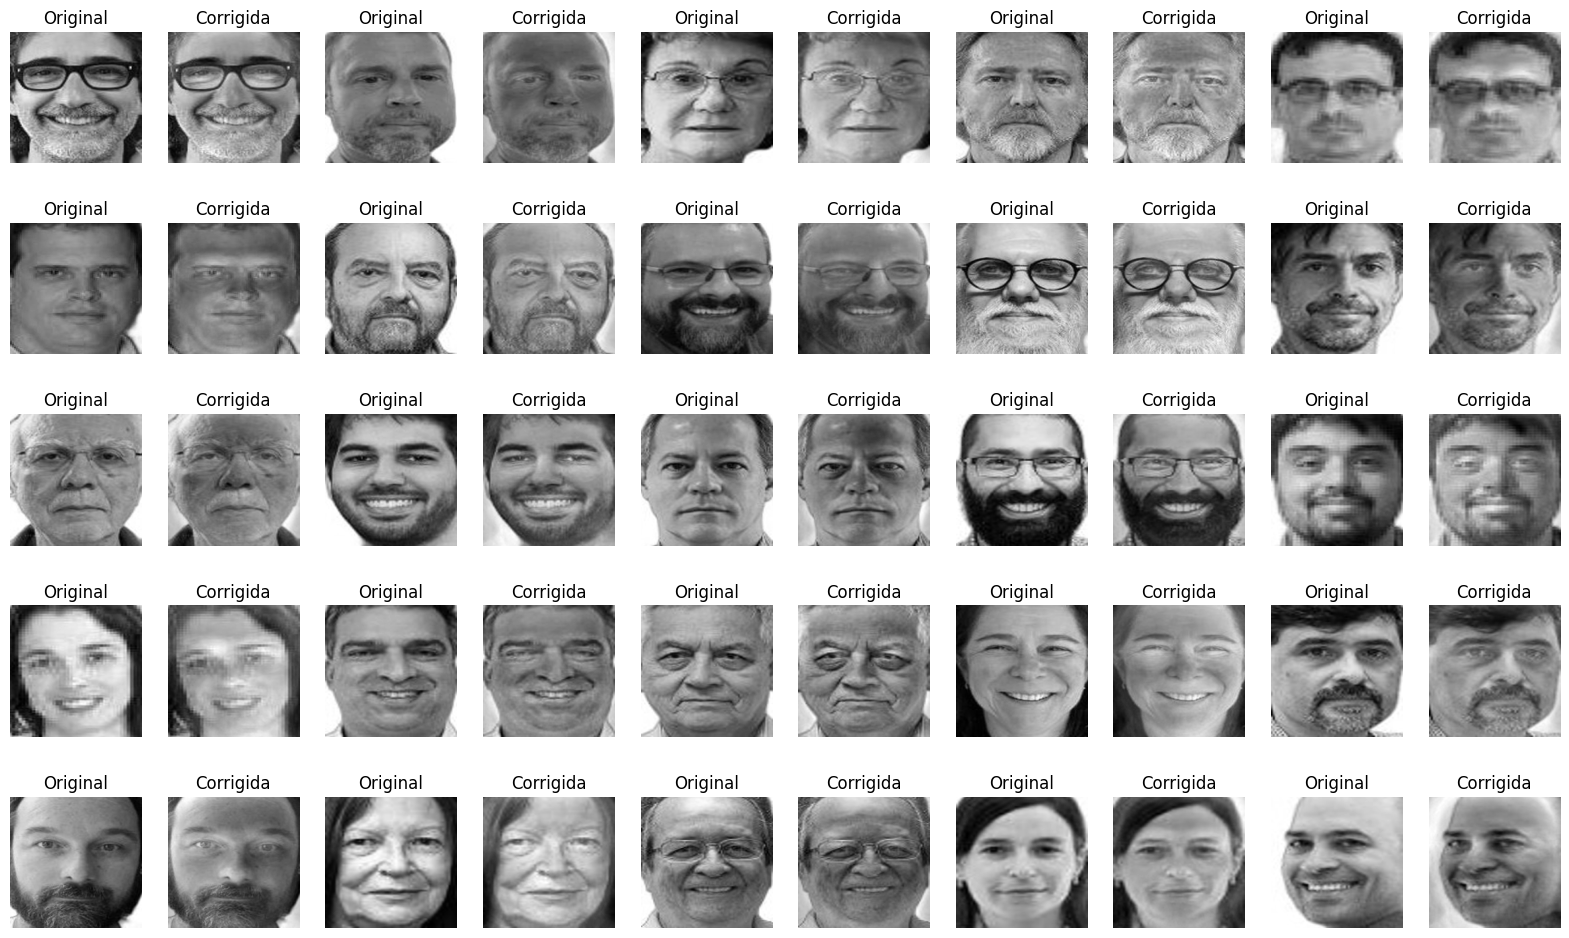

In [6]:
# Definição de uma grade para a plotagem de imagens
fig, axes = plt.subplots(5,10, figsize=(20,12))

for i, ax in enumerate(axes.flat):
    # Divide por 2 para alternar entre A e M
    indice = i // 2  
    
    # Definição da imagem a ser plotada
    tipo = 'Original' if not i % 2 else 'Corrigida'
    Matriz = A if not i % 2 else M

    # Plotagem das imagens
    ax.imshow(Matriz[indice].reshape(DIMENSAO_IMAGEM), cmap=plt.cm.gray)
    ax.set_title(f'{tipo}')
    ax.axis('off')

# Próximo passo - (Pensando no que fazer)
Gerar Matrizes P e C.

P = A * A^(T)

C = Matriz de covariância de A

P resolve para SVD e C para PCA.

In [20]:
import time

# Marca o tempo de início
start_time = time.time()

# Seu código aqui
P = np.dot(A, A.T)
print(P.shape)

# Marca o tempo de término
end_time = time.time()

# Calcula o tempo decorrido
elapsed_time = end_time - start_time

print(f"Tempo decorrido: {elapsed_time} segundos")

(30, 30)
Tempo decorrido: 0.0027315616607666016 segundos


In [ ]:
import time
# Marca o tempo de início
start_time2 = time.time()

# Seu código aqui
P = np.dot(A.T, A)
print(P.shape)

# Marca o tempo de término
end_time2 = time.time()

# Calcula o tempo decorrido
elapsed_time2 = end_time2 - start_time2

print(f"Tempo decorrido: {elapsed_time2} segundos")

# Testes - 1

# (RASCUNHO) Para achar eigenfaces

In [ ]:
# TODO - Alterar comentário
# Using full_matrices=False to avoid doing unnecessary calculations
_, _, eigenfaces = np.linalg.svd(M, full_matrices=False)